# HANC with a Welfare State

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Test 1: Solving and simulating the household problem](#toc2_)    
- 3. [Test 2: Evaluating the objective for finding the steady state](#toc3_)    
- 4. [Find stationary equilibrium](#toc4_)    
- 5. [Grid search](#toc5_)    
- 6. [Policy functions](#toc6_)    
- 7. [Simulation](#toc7_)    
- 8. [Test transition path](#toc8_)    
- 9. [Find transition path](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
import numba as nb
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HANCWelfareModelClass()

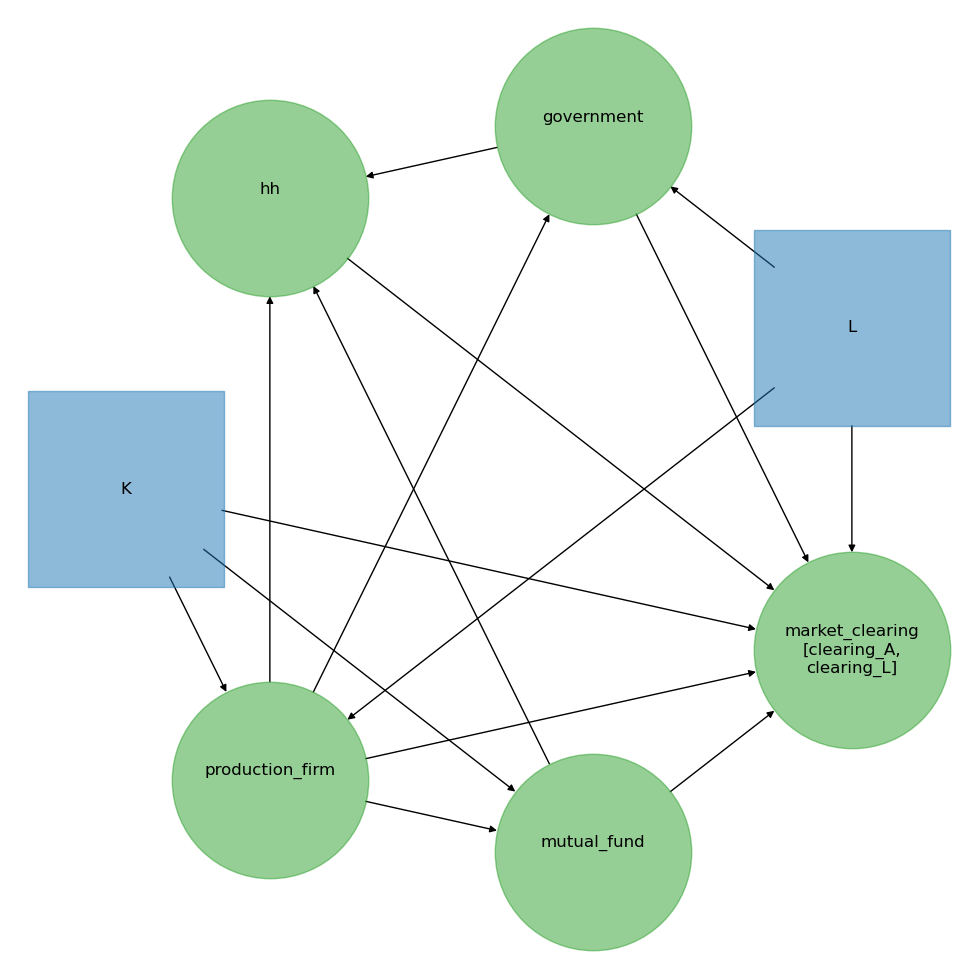

In [3]:
model.draw_DAG()

In [4]:
model.find_ss(do_print=True)

starting at [3.8624]

 message: The solution converged.
 success: True
  status: 1
     fun: 5.1958437552457326e-14
       x: [ 3.523e+00]
    nfev: 10
    fjac: [[-1.000e+00]]
       r: [-8.498e+00]
     qtf: [-1.036e-08]

steady state found in 4.6 secs
ss.K =  2.992
ss.B =  0.000
ss.A_hh =  2.992
ss.L =  0.849
ss.Lg =  0.287
ss.Y =  1.239
ss.G =  0.287
ss.r =  0.024
ss.w =  1.021
ss.wt =  0.511
ss.clearing_A = 5.20e-14
ss.clearing_L = 0.00e+00
ss.clearing_Y = 1.16e-10


In [5]:
par = model.par
ss = model.ss

We can now solve and simulate:

In [6]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.3 secs [438 iterations]


In [7]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 0.0 secs [572 iterations]


note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.4 secs
household problem simulated along transition in 0.3 secs



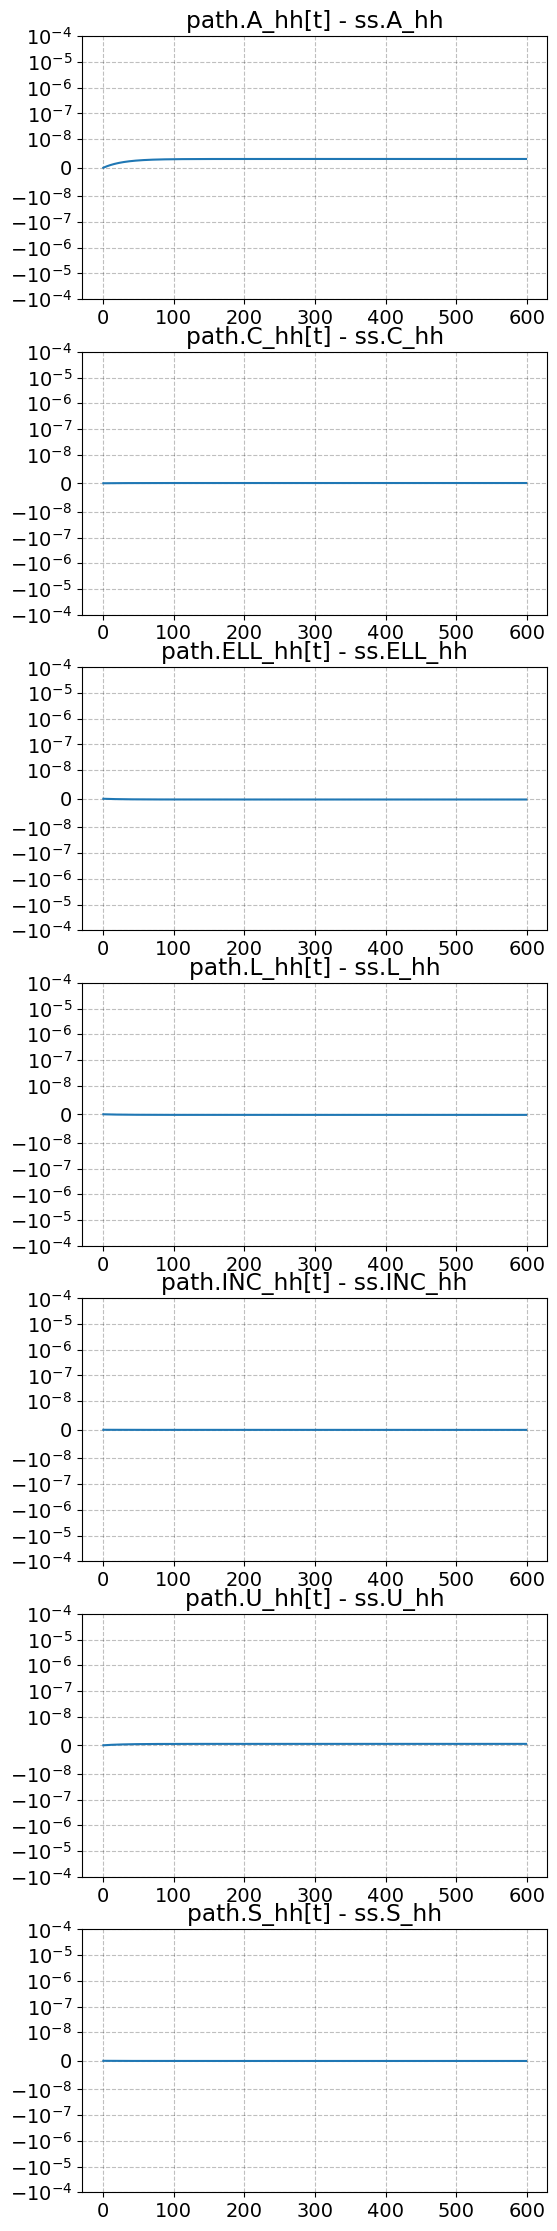

In [8]:
model.test_hh_path()

## 6. <a id='toc6_'></a>[Policy functions](#toc0_)

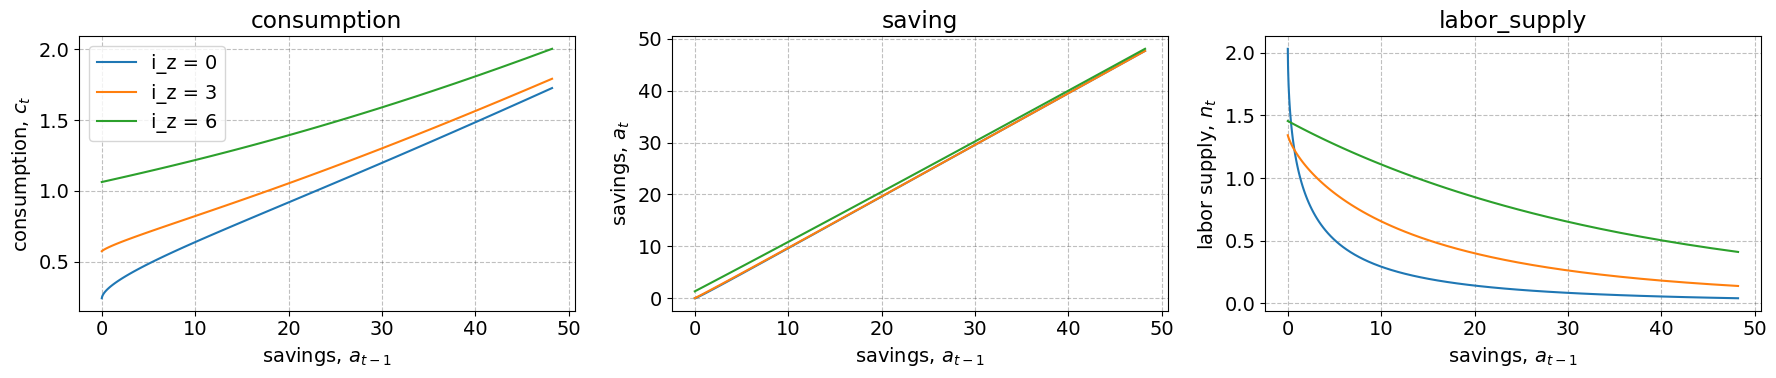

In [9]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 50

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()
plt.show()

## 7. <a id='toc7_'></a>[Simulation](#toc0_)

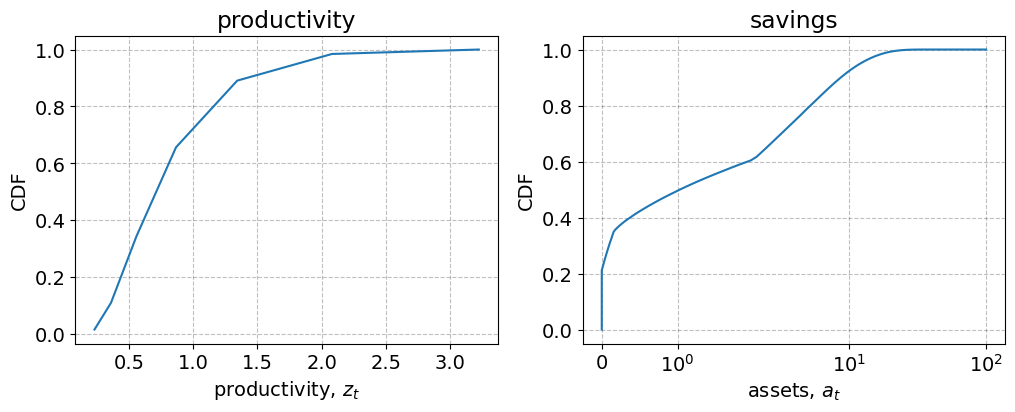

In [10]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D,axis=(0,2)))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

## 8. <a id='toc8_'></a>[Test transition path](#toc0_)

In [11]:
try:
    model.test_ss()
except Exception as e:
    print('you need to update GEModelTools to call this function (optional)')

you need to update GEModelTools to call this function (optional)


note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.4 secs
household problem simulated along transition in 0.0 secs



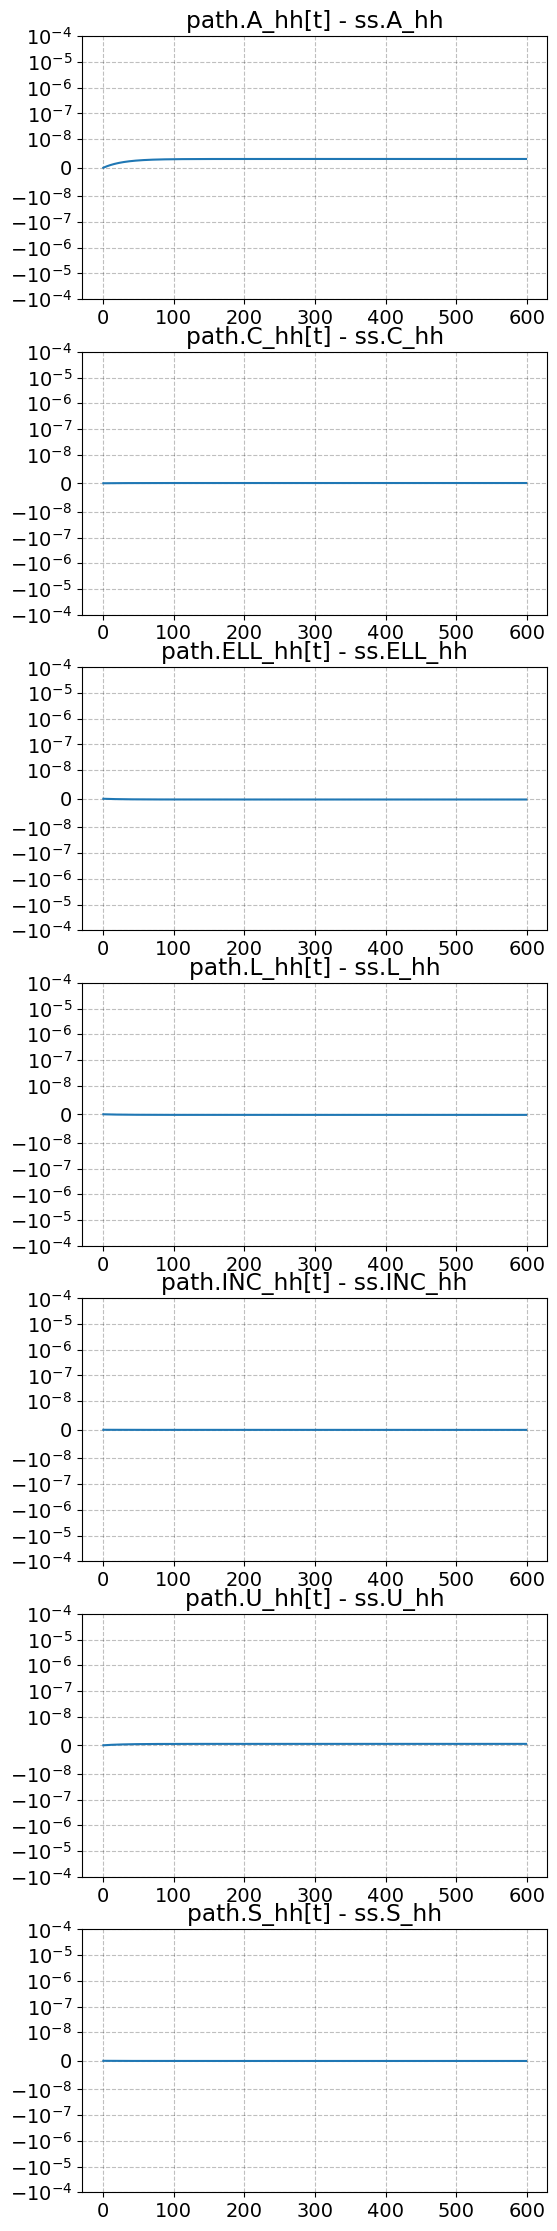

In [12]:
model.test_hh_path()

In [13]:
model.test_path(in_place=True)

shocks: 
unknowns: K L 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 B                0.0e+00
 G                0.0e+00
 tau              0.0e+00
 Lg               0.0e+00
 wt               0.0e+00
hh
 A_hh             3.1e-09
 C_hh             8.3e-11
 ELL_hh           2.6e-10
 L_hh             2.1e-10
 INC_hh           3.1e-11
 U_hh             5.0e-10
 S_hh             5.3e-11
blocks.market_clearing
 I                5.6e-17
 clearing_A       3.1e-09 [target]
 clearing_L       2.1e-10 [target]
 clearing_Y       2.9e-01


## 9. <a id='toc9_'></a>[Find transition path](#toc0_)

In [14]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for r               in 0.5 secs
curly_Y and curly_D calculated for w               in 0.5 secs
curly_Y and curly_D calculated for wt              in 0.4 secs
curly_E calculated in 0.6 secs
builiding blocks combined in 0.6 secs
household Jacobian computed in 2.6 secs

full Jacobians:
full Jacobian to unknowns computed in 0.7 secs [in evaluate_blocks(): 0.4 secs]
full Jacobian to shocks computed in 0.0 secs [in evaluate_blocks(): 0.0 secs]


In [15]:
model.find_transition_path(shocks=[],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 3.07e-09
   3.07e-09 in clearing_A
   2.11e-10 in clearing_L
 it =   1 -> max. abs. error = 1.23e-13
   1.23e-13 in clearing_A
   1.07e-14 in clearing_L
clearing_Y: terminal value is   0.28709103, but ss value is   0.00000000

transition path found in 1.7 secs


In [16]:
u_g = (ss.G+par.S)**(1-par.omega)/(1-par.omega)
print(u_g)

-3.4832155890636662


In [17]:
v = np.sum([par.beta**t * ((np.sum((ss.u+u_g) * ss.D / (np.sum(ss.D))))) for t in range(par.T)])
print(v)

-149.88584446709152


In [18]:
def obj(tau):
    model.par.tau_ss = tau
    model.find_ss()
    return -np.sum([par.beta**t * ((np.sum((ss.u+(ss.G+par.S)**(1-par.omega)/(1-par.omega)) * ss.D / (np.sum(ss.D))))) for t in range(par.T)])

In [19]:
opt_tau = optimize.minimize_scalar(obj,bounds=(0.0,0.99),method='bounded')

In [20]:
model.par.tau_ss = opt_tau.x
opt_tau

 message: Solution found.
 success: True
  status: 0
     fun: 138.96802974832232
       x: 0.6551037720366287
     nit: 10
    nfev: 10

In [29]:
def obj2(tau,chi):
    model.par.tau_ss = tau
    model.par.chi = chi
    model.find_ss()
    return -np.sum([par.beta**t * ((np.sum((ss.u+(ss.G+par.S)**(1-par.omega)/(1-par.omega)) * ss.D / (np.sum(ss.D))))) for t in range(par.T)])

In [36]:
opt = optimize.minimize(lambda x: obj2(x[0],x[1]),x0=(0.655,0.0),method='Nelder-Mead')

In [38]:
opt

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 136.88928488024985
             x: [ 4.766e-01 -2.182e-01]
           nit: 46
          nfev: 87
 final_simplex: (array([[ 4.766e-01, -2.182e-01],
                       [ 4.766e-01, -2.182e-01],
                       [ 4.767e-01, -2.181e-01]]), array([ 1.369e+02,  1.369e+02,  1.369e+02]))

In [32]:
model.par.tau_ss = opt.x[0]
model.par.chi = opt.x[1]

In [33]:
model.find_ss(do_print=True)

starting at [3.8624]

 message: The solution converged.
 success: True
  status: 1
     fun: 1.1546319456101628e-13
       x: [ 3.676e+00]
    nfev: 8
    fjac: [[-1.000e+00]]
       r: [-8.356e+00]
     qtf: [-2.094e-08]

steady state found in 2.8 secs
ss.K =  3.479
ss.B =  0.000
ss.A_hh =  3.479
ss.L =  0.946
ss.Lg =  0.444
ss.Y =  1.399
ss.G =  0.444
ss.r =  0.021
ss.w =  1.034
ss.wt =  0.541
ss.clearing_A = 1.15e-13
ss.clearing_L = 0.00e+00
ss.clearing_Y = 1.32e-10


In [34]:
np.sum([par.beta**t * ((np.sum((ss.u+(ss.G+par.S)**(1-par.omega)/(1-par.omega)) * ss.D / (np.sum(ss.D))))) for t in range(par.T)])

-136.88928499725114

In [36]:
optnewt = optimize.newton(lambda x: obj(x[0],x[1]),x0=(0.5,0.5))

/Users/johanoelgaard/My Drive/04 Økonomi/07 Adv. Macro/02 Git/HANK-assignments-Martin/Assignment_II/estimating chi/steady_state.py:58: RuntimeWarning: invalid value encountered in scalar power
  ss.rK = par.alpha*par.Gamma_Y*(KL)**(par.alpha-1)
/Users/johanoelgaard/My Drive/04 Økonomi/07 Adv. Macro/02 Git/HANK-assignments-Martin/Assignment_II/estimating chi/steady_state.py:59: RuntimeWarning: invalid value encountered in scalar power
  ss.w = (1.0-par.alpha)*par.Gamma_Y*(KL)**par.alpha


AssertionError: invalid value r = nan

## 10. <a id='toc10_'></a>[Optimal tax rate with out transfers](#toc0_)

Use Brute Force Grid Search to find optimum

In [41]:
u_vec = -1000*np.ones(11)
tau_vec = np.linspace(0,0.99,11)
for i,tau_ss in enumerate(tau_vec):
    
    

    model_ = model.copy()
    
    model_.par.tau_ss = tau_ss
   
       
    model_.find_ss()

    print(f'{model_.par.tau_ss = :.2f}')

    u_vec[i] = np.sum([model_.par.beta**t * np.sum((model_.ss.u+(model_.ss.G+model_.par.S)**(1-model_.par.omega)/(1-model_.par.omega)) * model_.ss.D / (np.sum(model_.ss.D))) for t in range(model_.par.T)])

    print(f'{u_vec[i] = :.2f}')

    print('')

i_opt = np.argmax(u_vec)
opt_tau = tau_vec[i_opt]
print(f'Optimal income tax rate tau is close to {opt_tau:.2f} with utility {np.max(u_vec)}')

model_.par.tau_ss = 0.00
u_vec[i] = -2500000040.39

model_.par.tau_ss = 0.10
u_vec[i] = -564.93

model_.par.tau_ss = 0.20
u_vec[i] = -298.52

model_.par.tau_ss = 0.30
u_vec[i] = -212.24

model_.par.tau_ss = 0.40
u_vec[i] = -171.76

model_.par.tau_ss = 0.49
u_vec[i] = -150.62

model_.par.tau_ss = 0.59
u_vec[i] = -140.66

model_.par.tau_ss = 0.69
u_vec[i] = -139.66

model_.par.tau_ss = 0.79
u_vec[i] = -149.57

model_.par.tau_ss = 0.89
u_vec[i] = -181.69

model_.par.tau_ss = 0.99
u_vec[i] = -355.65

Optimal income tax rate tau is close to 0.69 with utility -139.6636529427227


In [42]:

tau_min = opt_tau-0.05
tau_maks = opt_tau+0.05
n_tau = int((tau_maks-tau_min)*100)+1
tau_vec = np.linspace(tau_min,tau_maks,n_tau)

u_vec = -1000*np.ones(n_tau)

model_ = model.copy()

for i,tau_ss in enumerate(tau_vec):
        
    model_.par.tau_ss = tau_ss
   
    try:   
        model_.find_ss()

        print(f'{model_.par.tau_ss = :.2f}')

        u_vec[i] = np.sum([model_.par.beta**t * np.sum((model_.ss.u+(model_.ss.G+model_.par.S)**(1-model_.par.omega)/(1-model_.par.omega)) * model_.ss.D / (np.sum(model_.ss.D))) for t in range(model_.par.T)])

        print(f'{u_vec[i] = :.2f}')

        print('')
    except Exception as e:
        pass
    

i_opt = np.argmax(u_vec)
print(f'Optimal income tax rate tau is {tau_vec[i_opt]:.2f} with utility {np.max(u_vec)}')


model_.par.tau_ss = 0.64
u_vec[i] = -139.04

model_.par.tau_ss = 0.65
u_vec[i] = -138.97

model_.par.tau_ss = 0.66
u_vec[i] = -139.00

model_.par.tau_ss = 0.67
u_vec[i] = -139.12

model_.par.tau_ss = 0.68
u_vec[i] = -139.34

model_.par.tau_ss = 0.69
u_vec[i] = -139.66

model_.par.tau_ss = 0.70
u_vec[i] = -140.09

model_.par.tau_ss = 0.71
u_vec[i] = -140.63

model_.par.tau_ss = 0.72
u_vec[i] = -141.28

model_.par.tau_ss = 0.73
u_vec[i] = -142.06

Optimal income tax rate tau is 0.65 with utility -138.97010079663735


## 11. <a id='toc11_'></a>[Optimal tax rate and transfers](#toc0_)

Start with rough grid search. NB. very long run time!

In [43]:
""" n_tau = 10
tau_vec = np.linspace(0, 0.9, n_tau)

u_vec = -1000 * np.ones((n_tau, 100))


for i, tau_ss in enumerate(tau_vec):
    model_ = model.copy()
    model_.par.tau_ss = tau_ss
    model_.find_ss()

    chi_min = -model_.ss.L ** (1 - model_.par.sigma_psi) * (model_.ss.w) * (1 - model_.ss.tau)
    chi_max = model_.ss.L ** (1 - model_.par.sigma_psi) * (model_.ss.w) * model_.ss.tau
    n_chi = int((chi_max - chi_min) *20)

    chi_vec = np.linspace(chi_min, chi_max, n_chi)

    for j, chi in enumerate(chi_vec):
        model_.par.chi = chi

        try:
            model_.find_ss()

            print(f'{model_.par.tau_ss = :.2f}')
            print(f'{model_.par.chi = :.2f}')

            utility = np.sum([model_.par.beta ** t * np.sum((model_.ss.u + (model_.ss.G + model_.par.S) ** (1 - model_.par.omega) / (1 - model_.par.omega)) * model_.ss.D / (np.sum(model_.ss.D))) for t in range(model_.par.T)])

            u_vec[i, j] = utility if utility <= 0 else -1000

        except Exception as e:
            pass
    
    if i > 0 and np.max(u_vec[i, :]) > np.max(u_vec[:i, :]):
        opt_tau_rough = tau_vec[i]
        opt_u = max(u_vec[i,:])
        j_opt = np.argmax(u_vec[i, :])
        opt_chi_rough = chi_vec[j_opt]

print('')

print(f'Optimal income tax rate tau is close to {opt_tau_rough:.2f} with optimal transfers close to {opt_chi_rough:.2f} and utility {np.max(u_vec)}')
 """

" n_tau = 10\ntau_vec = np.linspace(0, 0.9, n_tau)\n\nu_vec = -1000 * np.ones((n_tau, 100))\n\n\nfor i, tau_ss in enumerate(tau_vec):\n    model_ = model.copy()\n    model_.par.tau_ss = tau_ss\n    model_.find_ss()\n\n    chi_min = -model_.ss.L ** (1 - model_.par.sigma_psi) * (model_.ss.w) * (1 - model_.ss.tau)\n    chi_max = model_.ss.L ** (1 - model_.par.sigma_psi) * (model_.ss.w) * model_.ss.tau\n    n_chi = int((chi_max - chi_min) *20)\n\n    chi_vec = np.linspace(chi_min, chi_max, n_chi)\n\n    for j, chi in enumerate(chi_vec):\n        model_.par.chi = chi\n\n        try:\n            model_.find_ss()\n\n            print(f'{model_.par.tau_ss = :.2f}')\n            print(f'{model_.par.chi = :.2f}')\n\n            utility = np.sum([model_.par.beta ** t * np.sum((model_.ss.u + (model_.ss.G + model_.par.S) ** (1 - model_.par.omega) / (1 - model_.par.omega)) * model_.ss.D / (np.sum(model_.ss.D))) for t in range(model_.par.T)])\n\n            u_vec[i, j] = utility if utility <= 0 else

Result from rough search:

In [44]:
opt_tau_rough = 0.5
opt_chi_rough = -0.17

Fine grid search to get optimum using that utility is well behaved in both tau and chi to limit run time

In [45]:

tau_min = opt_tau_rough - 0.05
tau_max = opt_tau_rough + 0.05
n_tau = int((tau_max-tau_min)*100)+1
tau_vec = np.linspace(tau_min, tau_max, n_tau)

u_vec = -1000 * np.ones((n_tau, 100))

chi_min = opt_chi_rough-0.05
chi_max = opt_chi_rough+0.05
n_chi = int((chi_max - chi_min) * 100)+1
chi_vec = np.linspace(chi_min, chi_max, n_chi)

u_vec = -1000 * np.ones((n_tau, n_chi))

model_1 = model.copy()
for i, tau_ss in enumerate(tau_vec):

    model_1.par.tau_ss = tau_ss
    model_1.find_ss()


    for j, chi in enumerate(chi_vec):
        model_1.par.chi = chi

        try:
            model_1.find_ss()

            u_vec[i, j] = np.sum([model_1.par.beta ** t * np.sum((model_1.ss.u + (model_1.ss.G + model_1.par.S) ** (1 - model_1.par.omega) / (1 - model_1.par.omega)) * model_1.ss.D / (np.sum(model_1.ss.D))) for t in range(model_1.par.T)])

            # Check if u is increasing in j
            if j > 0 and u_vec[i, j] < u_vec[i, j-1]:
                print(f'Skipping to the next tau_ss due to decreasing u_vec in chi')
                break

            print(f'{model_1.par.tau_ss = :.2f}')
            print(f'{model_1.par.chi = :.2f}')
            print(f'{u_vec[i, j] = :.2f}')
            print('')

            

        except Exception as e:
            print(f'Error in iteration {j}, {model_1.par.chi = :.2f}, {model_1.par.tau_ss = :.2f} : {str(e)}')
            pass

        print('')
    
    if i > 0 and np.max(u_vec[i, :]) > np.max(u_vec[:i, :]):
        opt_tau = tau_vec[i]
        opt_u = max(u_vec[i,:])
        j_opt = np.argmax(u_vec[i, :])
        opt_chi = chi_vec[j_opt]

    if i > 0 and np.max(u_vec[i, :]) < np.max(u_vec[i-1, :]):
        print('')
        print(f'Steady state evaluated in optimum is:')
        model_1.par.tau_ss = opt_tau
        model_1.par.chi = opt_chi
        model_1.find_ss(do_print=True)
        print(f'Optimum Found! Optimum is in tau = {opt_tau:.2f} and chi = {opt_chi:.2f} with u = {opt_u:.2f}')
        break
    else:
        print('NEXT TAU')



model_1.par.tau_ss = 0.45
model_1.par.chi = -0.22
u_vec[i, j] = -137.13


Skipping to the next tau_ss due to decreasing u_vec in chi
NEXT TAU
model_1.par.tau_ss = 0.46
model_1.par.chi = -0.22
u_vec[i, j] = -136.98


Skipping to the next tau_ss due to decreasing u_vec in chi
NEXT TAU
model_1.par.tau_ss = 0.47
model_1.par.chi = -0.22
u_vec[i, j] = -136.90


Skipping to the next tau_ss due to decreasing u_vec in chi
NEXT TAU
model_1.par.tau_ss = 0.48
model_1.par.chi = -0.22
u_vec[i, j] = -136.90


model_1.par.tau_ss = 0.48
model_1.par.chi = -0.21
u_vec[i, j] = -136.89


Skipping to the next tau_ss due to decreasing u_vec in chi
NEXT TAU
model_1.par.tau_ss = 0.49
model_1.par.chi = -0.22
u_vec[i, j] = -136.97


model_1.par.tau_ss = 0.49
model_1.par.chi = -0.21
u_vec[i, j] = -136.91


model_1.par.tau_ss = 0.49
model_1.par.chi = -0.20
u_vec[i, j] = -136.90


Skipping to the next tau_ss due to decreasing u_vec in chi

Steady state evaluated in optimum is:
starting at [3.8624]

 message: The so

## 11. <a id='toc10_'></a>[Optimal tax rate and transfers with varying TFP](#toc0_)

Rough grid search. Use that utility is well behaved in both tau and chi to limit run time

In [46]:
tau_min = 0.00
tau_max = 0.90
n_tau = 10
tau_vec = np.linspace(tau_min, tau_max, n_tau)

u_vec = -1000 * np.ones((n_tau, 100))

model_ = model.copy()

for i, tau_ss in enumerate(tau_vec):
    
    model_.par.Gamma_Y = 1.1
    model_.par.tau_ss = tau_ss
    model_.find_ss()

    chi_min = -model_.ss.L*(1-model_.par.sigma_psi) * (model_.ss.w) * (1 - model_.ss.tau)
    chi_max = model_.ss.L *(1-model_.par.sigma_psi)* (model_.ss.w) * model_.ss.tau
    n_chi = int((chi_max - chi_min) * 20)

    chi_vec = np.linspace(chi_min, chi_max, n_chi)
   
    

    for j, chi in enumerate(chi_vec):
        model_.par.chi = chi

        try:
            model_.find_ss()

            u_vec[i, j] = np.sum([model_.par.beta ** t * np.sum((model_.ss.u + (model_.ss.G + model_.par.S) ** (1 - model_.par.omega) / (1 - model_.par.omega)) * model_.ss.D / (np.sum(model_.ss.D))) for t in range(model_.par.T)])

            # Check if u is increasing in j
            if j > 0 and u_vec[i, j] < u_vec[i, j-1]:
                print(f'Skipping to the next tau_ss due to decreasing u_vec in chi')
                break

            print(f'{model_.par.tau_ss = :.2f}')
            print(f'{model_.par.chi = :.2f}')
            print(f'{u_vec[i, j] = :.2f}')
            print('')

            

        except Exception as e:
            print(f'Error in iteration {j}, {model_.par.chi = :.2f}, {model_.par.tau_ss = :.2f} : {str(e)}')
            pass

        print('')

    if i > 0 and np.max(u_vec[i, :]) > np.max(u_vec[:i, :]):
        opt_tau_rough = tau_vec[i]
        opt_u = max(u_vec[i,:])
        j_opt = np.argmax(u_vec[i, :])
        opt_chi_rough = chi_vec[j_opt]

    if i > 0 and np.max(u_vec[i, :]) < np.max(u_vec[i-1, :]):
        print('')
        print(f'Optimum is close to tau = {opt_tau_rough:.2f} and chi = {opt_chi_rough:.2f} with u = {opt_u:.2f}')
        break
    else:
        print('NEXT TAU')
    
    


Error in iteration 0, model_.par.chi = -0.89, model_.par.tau_ss = 0.00 : too many iterations searching for ell

model_.par.tau_ss = 0.00
model_.par.chi = -0.83
u_vec[i, j] = -135.52


Skipping to the next tau_ss due to decreasing u_vec in chi
NEXT TAU


Fine grid search to get optimum

In [ ]:


tau_min = opt_tau_rough-0.05
tau_max = opt_tau_rough+0.05
n_tau = int((tau_max-tau_min)*100)+1
tau_vec = np.linspace(tau_min, tau_max, n_tau)

u_vec = -1000 * np.ones((n_tau, 100))

chi_min = opt_chi-0.05
chi_max = opt_chi+0.05
n_chi = int((chi_max - chi_min) * 100)+1
chi_vec = np.linspace(chi_min, chi_max, n_chi)

u_vec = -1000 * np.ones((n_tau, n_chi))

model_2 = model.copy()

for i, tau_ss in enumerate(tau_vec):

    model_2.par.Gamma_Y = 1.1
    model_2.par.tau_ss = tau_ss
    model_2.find_ss()

  

    for j, chi in enumerate(chi_vec):
        model_2.par.chi = chi

        try:
            model_2.find_ss()

            u_vec[i, j] = np.sum([model_2.par.beta ** t * np.sum((model_2.ss.u + (model_2.ss.G + model_2.par.S) ** (1 - model_2.par.omega) / (1 - model_2.par.omega)) * model_2.ss.D / (np.sum(model_2.ss.D))) for t in range(model_2.par.T)])

            # Check if u is increasing in j
            if j > 0 and u_vec[i, j] < u_vec[i, j-1]:
                print(f'Skipping to the next tau_ss due to decreasing u_vec in chi')
                break

            print(f'{model_2.par.tau_ss = :.2f}')
            print(f'{model_2.par.chi = :.2f}')
            print(f'{u_vec[i, j] = :.2f}')
            print('')

            

        except Exception as e:
            print(f'Error in iteration {j}, {model_2.par.chi = :.2f}, {model_2.par.tau_ss = :.2f} : {str(e)}')
            pass

        print('')
    if i > 0 and np.max(u_vec[i, :]) > np.max(u_vec[:i, :]):
        opt_tau = tau_vec[i]
        opt_u = max(u_vec[i,:])
        j_opt = np.argmax(u_vec[i, :])
        opt_chi = chi_vec[j_opt]

    if i > 0 and np.max(u_vec[i, :]) < np.max(u_vec[i-1, :]):
        print('')
        print(f'Steady state evaluated in optimum is:')
        model_2.par.tau_ss = opt_tau
        model_2.par.chi = opt_chi
        model_2.find_ss(do_print=True)
        print(f'Optimum Found! Optimum is in tau = {opt_tau:.2f} and chi = {opt_chi:.2f} with u = {opt_u:.2f}')
        break
    else:
        print('NEXT TAU')





 


model_2.par.tau_ss = 0.45
model_2.par.chi = -0.26
u_vec[i, j] = -129.03


Skipping to the next tau_ss due to decreasing u_vec in chi
NEXT TAU
model_2.par.tau_ss = 0.46
model_2.par.chi = -0.26
u_vec[i, j] = -128.90


Skipping to the next tau_ss due to decreasing u_vec in chi
NEXT TAU
model_2.par.tau_ss = 0.47
model_2.par.chi = -0.26
u_vec[i, j] = -128.85


Skipping to the next tau_ss due to decreasing u_vec in chi
NEXT TAU
model_2.par.tau_ss = 0.48
model_2.par.chi = -0.26
u_vec[i, j] = -128.86


model_2.par.tau_ss = 0.48
model_2.par.chi = -0.25
u_vec[i, j] = -128.84


Skipping to the next tau_ss due to decreasing u_vec in chi
NEXT TAU
model_2.par.tau_ss = 0.49
model_2.par.chi = -0.26
u_vec[i, j] = -128.94


model_2.par.tau_ss = 0.49
model_2.par.chi = -0.25
u_vec[i, j] = -128.87


model_2.par.tau_ss = 0.49
model_2.par.chi = -0.24
u_vec[i, j] = -128.84


Skipping to the next tau_ss due to decreasing u_vec in chi

Steady state evaluated in optimum is:
starting at [4.4258]

 message: The so

## 12. <a id='toc12_'></a>[Transition Path](#toc0_)